# Hello World - Classificação

In [34]:
import pandas as pd
import seaborn as sns
import numpy as np

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv'

dados = pd.read_csv(url)
dados

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Sim,Sim,24,Sim,Sim,DSL,Sim,Nao,Sim,Sim,Sim,Sim,UmAno,Sim,ChequePapel,84.80,Nao
7039,0,Sim,Sim,72,Sim,Sim,FibraOptica,Nao,Sim,Sim,Nao,Sim,Sim,UmAno,Sim,CartaoDeCredito,103.20,Nao
7040,0,Sim,Sim,11,Nao,SemServicoTelefonico,DSL,Sim,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.60,Nao
7041,1,Sim,Nao,4,Sim,Sim,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,74.40,Sim


## Transformando dataset

In [3]:
traducao_dic = {'Sim' : 1, 'Nao': 0}

dadosmodificados = dados [['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)


In [4]:
dadosmodificados

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1
...,...,...,...,...,...
7038,1,1,1,1,0
7039,1,1,1,1,0
7040,1,1,0,1,0
7041,1,0,1,1,1


In [5]:
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], axis=1))

dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)
dados_final

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,0,24,84.80,0,0,...,0,0,1,0,0,1,0,0,1,0
7039,1,1,1,1,0,0,72,103.20,0,0,...,0,0,1,0,0,1,1,0,0,0
7040,1,1,0,1,0,0,11,29.60,0,1,...,1,0,0,0,1,0,0,1,0,0
7041,1,0,1,1,1,1,4,74.40,0,0,...,1,0,0,0,1,0,0,0,1,0


In [6]:
pd.set_option('display.max_columns', 39)

In [7]:
dados_final

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,0,24,84.80,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
7039,1,1,1,1,0,0,72,103.20,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0
7040,1,1,0,1,0,0,11,29.60,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
7041,1,0,1,1,1,1,4,74.40,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0


## Balanceando dados

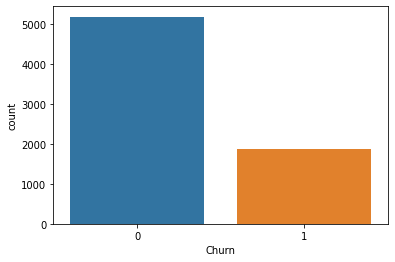

In [8]:
ax = sns.countplot(x='Churn', data=dados_final)

In [9]:
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [10]:
smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [11]:
dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


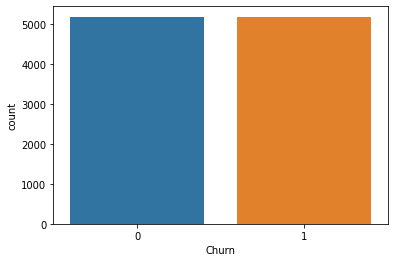

In [12]:
ax = sns.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.

In [13]:
dados_final.shape

(10348, 39)

## Modelo K-Nearest Neighbors (KNN)


In [14]:
# Treino e teste
X = dados_final.drop('Churn', axis = 1)
Y = dados_final['Churn']

In [15]:
X

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,1,29.850000,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,34,56.950000,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,0,2,53.850000,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,45,42.300000,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,0,2,70.700000,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,1,0,1,1,0,5,80.921075,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
10344,0,0,1,1,0,3,74.347278,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
10345,0,0,1,1,0,18,70.164647,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
10346,0,0,1,0,0,30,93.024726,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0


In [16]:
norm = StandardScaler()

x_normalizado = norm.fit_transform(X)
x_normalizado[0]

array([ 1.26542767, -0.52756038, -3.06083934,  0.81465673, -0.41350409,
       -1.10771299, -1.32176003, -0.88499468,  3.18604176, -0.83366906,
        1.51268338, -1.04386816, -0.44617598,  0.868102  , -0.44617598,
       -0.51766965, -0.95816089, -0.44617598,  1.57389661,  1.04285807,
       -0.44617598, -0.64211419,  0.87979784, -0.44617598, -0.52426638,
        1.18667256, -0.44617598, -0.77707385,  1.2033586 , -0.44617598,
       -0.78976268, -0.44648735,  0.73788726, -0.41989297, -0.42576817,
        1.30292044, -0.47882211, -0.4360152 ])

In [17]:
Xmaria = X.iloc[[50]]

In [18]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))
Xmaria_normalizado

array([[-0.79024667, -0.52756038,  0.32670777,  0.81465673,  2.41835579,
         0.64218992,  0.77815769, -0.88499468, -0.31386908,  1.19951675,
        -0.66107688,  0.95797538, -0.44617598,  0.868102  , -0.44617598,
        -0.51766965, -0.95816089, -0.44617598,  1.57389661,  1.04285807,
        -0.44617598, -0.64211419,  0.87979784, -0.44617598, -0.52426638,
        -0.84269245, -0.44617598,  1.28687897,  1.2033586 , -0.44617598,
        -0.78976268, -0.44648735,  0.73788726, -0.41989297, -0.42576817,
         1.30292044, -0.47882211, -0.4360152 ]])

### Distância Euclidiana

In [19]:
a = Xmaria_normalizado
b = x_normalizado[0]

In [20]:
#1 - Subtraindo
a - b

array([[-2.05567434,  0.        ,  3.38754711,  0.        ,  2.83185988,
         1.74990291,  2.09991772,  0.        , -3.49991084,  2.03318581,
        -2.17376025,  2.00184354,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -2.029365  ,  0.        ,  2.06395283,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ]])

In [21]:
#2 - Exponenciação
np.square(a-b)

array([[ 4.22579699,  0.        , 11.47547544,  0.        ,  8.01943037,
         3.0621602 ,  4.40965444,  0.        , 12.24937587,  4.13384454,
         4.72523363,  4.00737757,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         4.11832232,  0.        ,  4.25990126,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ]])

In [22]:
#3 - Soma
np.sum(np.square(a-b))

64.6865726280366

In [23]:
#4 - então tiramos a raiz quadrada e temos a nossa distância
np.sqrt(64.6865726280366)

8.042796318945085

Outros tipos de distância:

* distância euclidiana;
* distância de Manhattan;
* distância de Minkowski;
* distância de Chebyshev.

### Documentação

#### Nearest Neighbor: Classificação

https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms:~:text=1.6.7.1.%20Classification%C2%B6

#### KNeighbor Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

#### Métricas de distância
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html#sklearn.metrics.DistanceMetric


## Implementando o modelo

In [24]:
X_treino, X_teste, y_treino, y_teste = train_test_split(x_normalizado,y,test_size=0.3,random_state=123)

## Treino e teste

In [25]:
knn = KNeighborsClassifier(metric='euclidean')

In [26]:
knn.fit(X_treino,y_treino)

KNeighborsClassifier(metric='euclidean')

In [27]:
predito_knn = knn.predict(X_teste)

In [28]:
predito_knn

array([1, 0, 0, ..., 0, 1, 1])

In [29]:
def calcula_distancia(dados_clientes, dados_maria, numero_clientes):
    distancias = []

#loop para percorrer cliente por cliente
    for i in range(numero_clientes):
        dist1 = dados_maria - dados_clientes[i]            #subtração dos atributos
        soma_quadrado = np.sum(np.square(dist1))    #exponenciação e soma de todos os atributos
        distancias.append(np.sqrt(soma_quadrado))   #raiz quadrada da soma anterior

    return distancias

In [30]:
calcula_distancia(x_normalizado, Xmaria_normalizado, 10)

[8.042796318945085,
 9.48131649543433,
 7.6682105661639195,
 11.03194106369519,
 6.071220067943137,
 6.029199060031905,
 5.161607829780818,
 9.660226782979324,
 6.997806954511923,
 8.913155960867917]

## Teorema de Naive Bayes 

$$ P(y|X) = \frac{P(X|y) * P(y)}{P(X)} $$

$ P(y|X) $ = Probabilidade de y, dado que X acontenceu. Conhecido como "probabilidade a posteriori".

$ P(X|y) $ = Probabilidade de X, dado que y acontenceu. Conhecido como "Verossimilhança".

$ P(y) $ = Probabilidade a priori da classe. Qual a probabilidade de uma determinada classe ocorrer em toda a amostra. "Se o y vai ser 1 ou 0".

$ P(X) $ = Probabilidade a priori da evidência. Probabilidede de X.

In [31]:
P_x = 0.015
P_y = 0.14
P_Xy = 0.006

p_yX = (P_Xy * P_y) / P_x

print(p_yX)

print(f'Probabilidade de {p_yX:.3f}%')

0.056000000000000015
Probabilidade de 0.056%


### Multivariada de Bernoulli

Os dados estão apenas em variáveis binárias (1 ou 0).

$$ P(x{i}|y) = P(i|y)x{i} + (1-P(i|y))(1-x{i}) $$

*i* = número de características no conjunto de variáveis.

y = classe (1 ou 0)

$ P(i|y) $ = Parâmetro *p* da Distribuição de Bernoulli". Probabilidade de *i* dado *y* aconteceu. 

$ x{i} $ = Características (variáveis dos conjuntos de dados)

### Treinamento e Teste

In [32]:
X_treino

array([[-0.79024667, -0.52756038, -3.06083934, ..., -0.76750657,
         2.08845829, -0.4360152 ],
       [ 1.26542767,  1.89551764,  0.32670777, ..., -0.76750657,
         2.08845829, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47882211, -0.4360152 ],
       ...,
       [ 1.26542767,  1.89551764,  0.32670777, ..., -0.76750657,
         2.08845829, -0.4360152 ],
       [ 1.26542767,  1.89551764,  0.32670777, ...,  1.30292044,
        -0.47882211, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47882211, -0.4360152 ]])

In [33]:
y_treino

4831    0
5077    0
9023    1
4424    1
5236    0
       ..
9785    1
7763    1
5218    0
1346    1
3582    0
Name: Churn, Length: 7243, dtype: int64

In [36]:
mediana_X_treino = np.median(X_treino)
mediana_X_treino

-0.4461759755508453

In [37]:
bnb = BernoulliNB(binarize=mediana_X_treino)

In [38]:
bnb.fit(X_treino,y_treino)

BernoulliNB(binarize=-0.4461759755508453)

In [39]:
predito_bnb = bnb.predict(X_teste)

## Árvore de Decisão

Decisões a partir de cada variável a partir de "nós de decisão".

Vantagens:
* Ela é fácil de se entender/visualizar 
* Não necessita fazer tratamentos, limpeza, normalização porque ela não é tão sensível a outliers.
* Trabalha com variáveis categórias e numéricas


Desvantagens:
* Possibilidade de overfitting caso cresça muito.

### Como funciona uma árvore de decisão??

#### Critérios de decisão dos nós

* Índice Gini
* Ganho de informação (entropia)
* Qui-quadrado
* Redução da variância



#### Índice Gini

Medir o quanto heterogêneo é o dado (quão "impuro" ele é consigo mesmo). 
Quanto mais próximo de 1, mais heterogêneo.
Quanto menos próximo de 1, mais homogêneo.


$$ G = {∑^c}_{k=1}Pk(1-Pk) $$

Pk = probabilidade de ocorrência de um dado dado da classe K

(1-Pk) = Probabilidade de não ocorrência de um dado da classe K


#### Ganho de informação (entropia)

Mede a ordem dos dados.
Quanto maior a entropia, mais desornado.
Quanto menor a entropia, menos desordenado.


$$ Entropia = -{∑^c}_{i=1}Pk * log(Pk) $$

Pk = probabilidade de ocorrência de um dado dado da classe K
